In [160]:
!git clone https://github.com/juandiegov16/IA-SVM-datasetSA.git

fatal: destination path 'IA-SVM-datasetSA' already exists and is not an empty directory.


Para el pre-procesamiento de los datos utilizaremos Pandas.

In [161]:
import pandas as pd

Aquí se importa el dataset y como vista previa imprimiremos las 5 primeras filas.

In [162]:
data = pd.read_csv('IA-SVM-datasetSA/datasetSA.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


Ahora a darle los nombres que corresponden a las columnas, según la documentación del dataset.

In [163]:
columnas = ['Presión Arterial Sistólica','Tabaco Acumulado','Colesterol LDL','Adiposidad','Historial Familiar','Comportamiento Tipo A','Obesidad','Consumo Alcohol','Edad','Enfermedad Cardíaca']
data.columns=columnas
data.head()

,Presión Arterial Sistólica,Tabaco Acumulado,Colesterol LDL,Adiposidad,Historial Familiar,Comportamiento Tipo A,Obesidad,Consumo Alcohol,Edad,Enfermedad Cardíaca
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


El paso siguiente es limpieza. Veamos si tenemos todo en el mismo formato y si faltan datos.

In [164]:
data.dtypes

Presión Arterial Sistólica      int64
Tabaco Acumulado              float64
Colesterol LDL                float64
Adiposidad                    float64
Historial Familiar              int64
Comportamiento Tipo A           int64
Obesidad                      float64
Consumo Alcohol               float64
Edad                            int64
Enfermedad Cardíaca             int64
dtype: object

In [165]:
data.isnull().sum()

Presión Arterial Sistólica    0
Tabaco Acumulado              0
Colesterol LDL                0
Adiposidad                    0
Historial Familiar            0
Comportamiento Tipo A         0
Obesidad                      0
Consumo Alcohol               0
Edad                          0
Enfermedad Cardíaca           0
dtype: int64

No hay campos nulos, afortunadamente.

(Las columnas con 1 y 2 deben cambiarse a 0 y 1 para reflejar la clasificación binaria.)

In [166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Historial Familiar']=encoder.fit_transform(data['Historial Familiar'])
data['Enfermedad Cardíaca']=encoder.fit_transform(data['Enfermedad Cardíaca'])
data.head()

,Presión Arterial Sistólica,Tabaco Acumulado,Colesterol LDL,Adiposidad,Historial Familiar,Comportamiento Tipo A,Obesidad,Consumo Alcohol,Edad,Enfermedad Cardíaca
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


La presión arterial sistólica también nos convendría tenerla a una escala con 100 como tope.

In [167]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))
data['Presión Arterial Sistólica'] = scale.fit_transform(data['Presión Arterial Sistólica'].values.reshape(-1,1))
data.head()

,Presión Arterial Sistólica,Tabaco Acumulado,Colesterol LDL,Adiposidad,Historial Familiar,Comportamiento Tipo A,Obesidad,Consumo Alcohol,Edad,Enfermedad Cardíaca
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


Ahora, unas cuantas visualizaciones de datos. Para aquellos gráficos que incluyen presión arterial sistólica, recordar que los valores originales abarcan de 100 a 220 (con el escalado quedaron de 0 a 100)

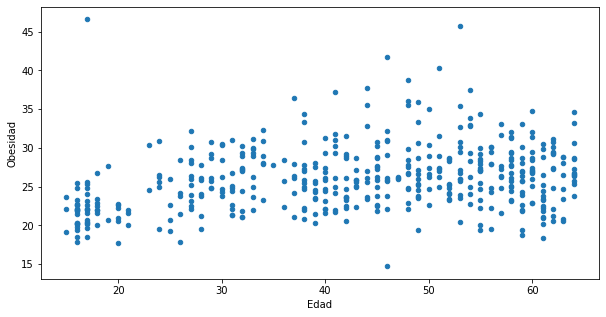

In [168]:
data.plot(x='Edad',y='Obesidad',kind='scatter',figsize =(10,5))

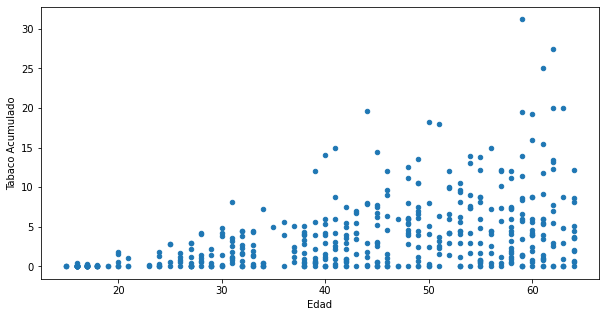

In [169]:
data.plot(x='Edad',y='Tabaco Acumulado',kind='scatter',figsize =(10,5))


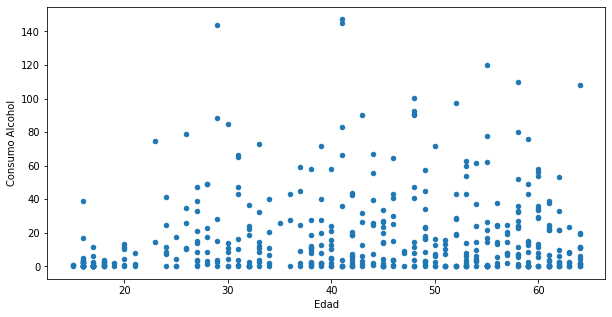

In [170]:
data.plot(x='Edad',y='Consumo Alcohol',kind='scatter',figsize =(10,5))

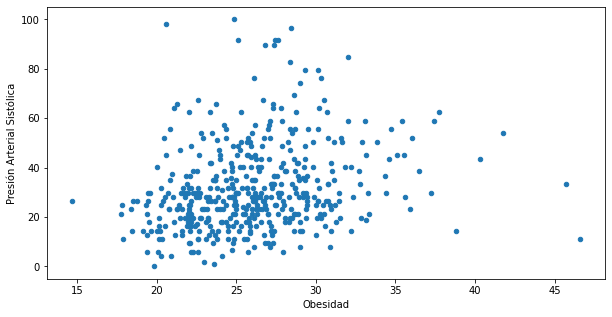

In [171]:
data.plot(x='Obesidad',y='Presión Arterial Sistólica',kind='scatter',figsize =(10,5))

Conclusiones a obtenerse de estas visualizaciones:

*   Relación lineal edad-obesidad
*   Con la edad aumenta el consumo de tabaco
*   Consumo de alcohol comienza por los 20 años y se mantiene
*   No parece existir relación directa entre obesidad y presión arterial sistólica






In [172]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

Definición de variables independiente/dependiente

In [173]:
y = data['Enfermedad Cardíaca']
X = data.drop('Enfermedad Cardíaca', axis =1)

Separación de datos de prueba y de entrenamiento

In [174]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)


Selección del algoritmo (kernel lineal)

In [175]:
algorithm = svm.SVC(kernel ='linear')


Ahora, la parte gorda. Entrenar el algoritmo con nuestros datos de entrenamiento.

In [176]:
algorithm.fit(X_training, y_training)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [177]:
y_test_pred = algorithm.predict(X_test)


Ahora vamos a agregar una [función](https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py) para que nuestra matriz de confusión y las estadísticas relevantes se vea todo bonito. (Crédito por la función a @dtuk81 en Github).

In [178]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)


[[57  9]
 [17 10]]


In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

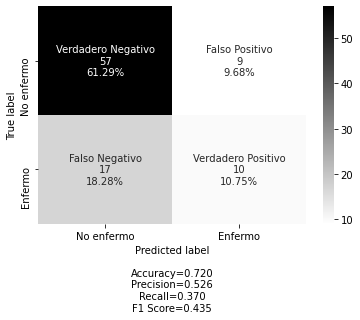

In [185]:
labels = ["Verdadero Negativo","Falso Positivo","Falso Negativo","Verdadero Positivo"]
categories = ["No enfermo", "Enfermo"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="binary")